<a href="https://colab.research.google.com/github/ara42/Deep-Learning/blob/main/%EB%AA%A8%EB%8D%B8_%EC%83%9D%EC%84%B1_%EB%B0%A9%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

## Sequential 모델 사용

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

In [3]:
model = models.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
         ]
        )

In [4]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [5]:
model.build(input_shape=(None,3))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-9.53245163e-03, -1.66174084e-01, -2.36802757e-01,
         -1.85169339e-01, -2.10110396e-01,  4.22773361e-02,
          1.71756238e-01,  2.57865310e-01,  2.37612426e-01,
         -9.80412811e-02,  1.44936740e-01,  2.08020866e-01,
          1.36618257e-01,  2.24908292e-01, -2.98340261e-01,
         -1.91945851e-01, -2.71386504e-01,  2.75582314e-01,
         -8.88894796e-02, -1.02060139e-01, -7.58869052e-02,
          2.42895126e-01,  2.79330909e-01,  1.69542402e-01,
         -1.62178278e-01,  1.36890113e-01,  1.25487298e-01,
          2.18006730e-01,  2.71587789e-01, -2.08312452e-01,
         -1.06009513e-01, -2.18142688e-01, -2.55060494e-01,
          1.22331947e-01,  3.14087868e-02, -1.36212021e-01,
          1.16376489e-01,  1.78346872e-01, -1.80522695e-01,
         -2.09183887e-01, -2.74481475e-01,  2.10567534e-01,
          2.42769778e-01, -1.04468465e-02, -2.68407047e-01,
         -2.61950940e-01,  2.11

In [8]:
model = models.Sequential(name='ar_s_model')
model.add(layers.Dense(64,activation='relu',name='comic'))
model.add(layers.Dense(10,activation='softmax',name='youna'))
model.build(input_shape=(None,10))
model.summary()

Model: "ar_s_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 comic (Dense)               (None, 64)                704       
                                                                 
 youna (Dense)               (None, 10)                650       
                                                                 
Total params: 1,354
Trainable params: 1,354
Non-trainable params: 0
_________________________________________________________________


## 함수형

In [9]:
inputs = keras.Input(shape=(3,),name="my_input")
hidden1 = layers.Dense(64,activation='relu')(inputs)
outputs = layers.Dense(10,activation='softmax')(hidden1)

In [10]:
model = keras.Model(inputs=inputs,outputs=outputs)

In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
hidden1.shape

TensorShape([None, 64])

In [13]:
outputs.shape

TensorShape([None, 10])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## 다중 입력 다중 출력

In [15]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [16]:
title = keras.Input(shape=(vocabulary_size,),name='title')
body = keras.Input(shape=(vocabulary_size,),name='body')
tags = keras.Input(shape=(num_tags,),name='tags')

In [17]:
data = layers.Concatenate()([title,body,tags])
hidden = layers.Dense(64,activation='relu')(data)

In [18]:
priority = layers.Dense(1,activation='sigmoid',name='priority')(hidden)
department = layers.Dense(num_departments,activation='softmax', name='department')(hidden)

In [19]:
model = keras.Model(inputs=[title,body,tags], outputs=[priority,department])

In [20]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 body (InputLayer)              [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'body[0][0]',             

In [21]:
import numpy as np

In [22]:
num_samples = 1280

In [23]:
title_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
body_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
tag_data = np.random.randint(0,vocabulary_size,size=(num_samples,num_tags))

In [24]:
priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples,num_departments))

In [25]:
model.compile(optimizer='rmsprop',
              loss=['mse','categorical_crossentropy'],
              metrics=[['mae'],['accuracy']])

In [26]:
model.fit([title_data,body_data,tag_data],[priority_data,department_data],epochs=20)

Epoch 1/20
40/40 [==============================] - 2s 19ms/step - loss: 1213.5691 - priority_loss: 0.3520 - department_loss: 1213.2172 - priority_mae: 0.5175 - department_accuracy: 0.2031
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 983.1841 - priority_loss: 0.3516 - department_loss: 982.8323 - priority_mae: 0.5171 - department_accuracy: 0.2148
Epoch 3/20
40/40 [==============================] - 1s 18ms/step - loss: 1201.6392 - priority_loss: 0.3516 - department_loss: 1201.2874 - priority_mae: 0.5171 - department_accuracy: 0.2383
Epoch 4/20
40/40 [==============================] - 1s 18ms/step - loss: 1367.7947 - priority_loss: 0.3516 - department_loss: 1367.4434 - priority_mae: 0.5171 - department_accuracy: 0.2359
Epoch 5/20
40/40 [==============================] - 1s 17ms/step - loss: 1717.2852 - priority_loss: 0.3516 - department_loss: 1716.9338 - priority_mae: 0.5171 - department_accuracy: 0.2297
Epoch 6/20
40/40 [==============================] - 1s 17

In [27]:
model.evaluate([title_data,body_data,tag_data],[priority_data,department_data])

40/40 [==============================] - 1s 14ms/step - loss: 10135.6348 - priority_loss: 0.3516 - department_loss: 10135.2793 - priority_mae: 0.5171 - department_accuracy: 0.2602


[10135.634765625,
 0.3516283929347992,
 10135.279296875,
 0.5171447992324829,
 0.2601562440395355]

In [28]:
model.predict([title_data,body_data,tag_data])

40/40 [==============================] - 1s 11ms/step


[array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([[0.        , 0.99999994, 0.        , 0.        ],
        [0.        , 0.99999994, 0.        , 0.        ],
        [0.        , 0.99999994, 0.        , 0.        ],
        ...,
        [0.        , 0.99999994, 0.        , 0.        ],
        [0.        , 0.99999994, 0.        , 0.        ],
        [0.        , 0.99999994, 0.        , 0.        ]], dtype=float32)]

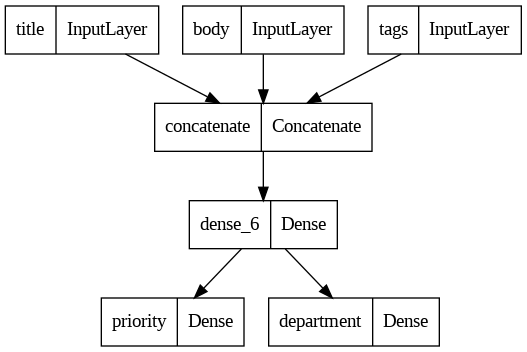

In [29]:
keras.utils.plot_model(model)

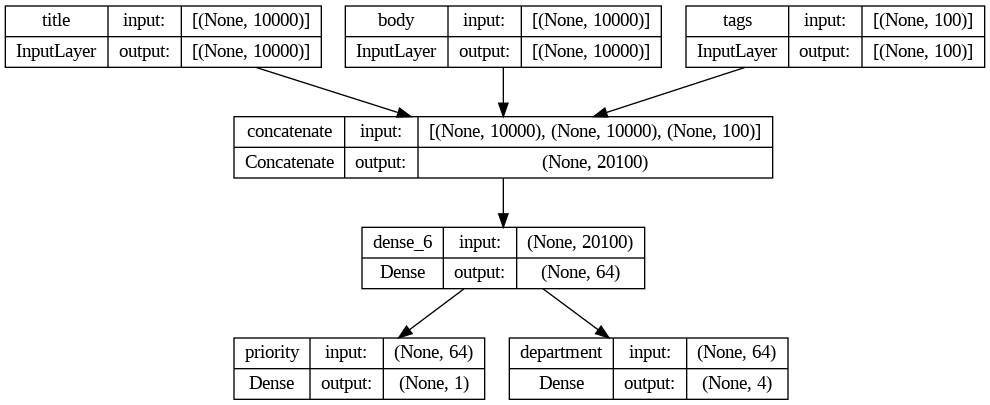

In [30]:
keras.utils.plot_model(model,show_shapes=True)

In [31]:
model.layers

In [33]:
model.layers[0].input, model.layers[0].output

(<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>)

In [34]:
model.layers[4].input, model.layers[4].output

(<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_6')>)

In [35]:
hidden  = model.layers[4].output

In [36]:
difficulty = layers.Dense(3,activation='softmax',name='difficulty')(hidden)

In [37]:
nm = keras.Model(
    inputs = [title,body,tags],
    outputs=[priority,department,difficulty]
)

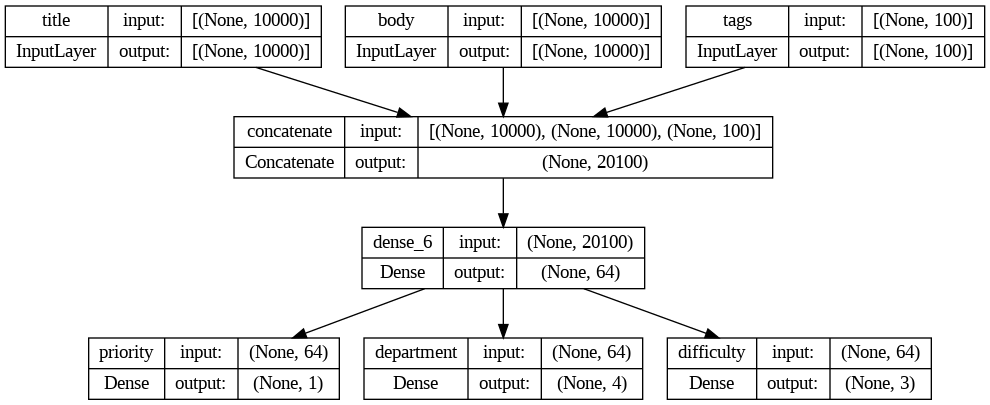

In [38]:
keras.utils.plot_model(nm,show_shapes=True)

In [39]:
class CustomerTicketModel(keras.Model):
  def __init__(self,num_departments):
    super().__init__() #기반 클래스의 __init__ 호출
    self.data_layer = layers.Concatenate()
    self.hidden_layer = layers.Dense(64,activation='relu')
    self.priority_layer = layers.Dense(1,activation='sigmoid',name='priority')
    self.department_layer = layers.Dense(num_departments,activation='softmax',
                          name='department')
  def call(self,inputs): # yp = wx+b 포워딩
    title = inputs[0]
    body = inputs[1]
    tags = inputs[2]
    data = self.data_layer([title,body,tags])
    hidden = self.hidden_layer(data)
    priority = self.priority_layer(hidden)
    department = self.department_layer(hidden)
    return priority, department

In [40]:
model = CustomerTicketModel(4)
priority, department = model([title_data,body_data,tag_data]) #call 함수를 호출함
print(priority)
print(department)

tf.Tensor(
[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]], shape=(1280, 1), dtype=float32)
tf.Tensor(
[[0.         0.         0.99999994 0.        ]
 [0.         0.         0.99999994 0.        ]
 [0.         0.         0.99999994 0.        ]
 ...
 [0.         0.         0.99999994 0.        ]
 [0.         0.         0.99999994 0.        ]
 [0.         0.         0.99999994 0.        ]], shape=(1280, 4), dtype=float32)


In [41]:
model = CustomerTicketModel(4)
model.compile(optimizer='rmsprop',
              loss=['mse','categorical_crossentropy'],
              metrics=[['mae'],['accuracy']])
model.fit(
    [title_data,body_data,tag_data],
    [priority_data,department_data],epochs=20)

Epoch 1/20
40/40 [==============================] - 2s 20ms/step - loss: 1754.3555 - output_1_loss: 0.3173 - output_2_loss: 1754.0378 - output_1_mae: 0.4828 - output_2_accuracy: 0.2586
Epoch 2/20
40/40 [==============================] - 1s 27ms/step - loss: 2001.1937 - output_1_loss: 0.3173 - output_2_loss: 2000.8762 - output_1_mae: 0.4829 - output_2_accuracy: 0.2305
Epoch 3/20
40/40 [==============================] - 1s 27ms/step - loss: 2118.7705 - output_1_loss: 0.3173 - output_2_loss: 2118.4524 - output_1_mae: 0.4829 - output_2_accuracy: 0.2680
Epoch 4/20
40/40 [==============================] - 1s 22ms/step - loss: 2846.9788 - output_1_loss: 0.3173 - output_2_loss: 2846.6611 - output_1_mae: 0.4829 - output_2_accuracy: 0.2570
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 3471.0457 - output_1_loss: 0.3173 - output_2_loss: 3470.7280 - output_1_mae: 0.4829 - output_2_accuracy: 0.2461
Epoch 6/20
40/40 [==============================] - 1s 18ms/step - loss: 39

## 혼합

In [42]:
class Classifier(keras.Model): #분류기
  def __init__(self,num_classes=2):
    super().__init__()
    if num_classes <= 2:
      num_units = 1 #출력 뉴런 개수가 1
      activation ='sigmoid'
    else:
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(num_units,activation=activation)
  def call(self,inputs):
    return self.dense(inputs)

In [43]:
inputs = keras.Input(shape=(3,))
hidden = layers.Dense(64,activation='relu')(inputs)
perceptron = Classifier(num_classes=10)
outputs = perceptron(hidden)
model = keras.Model(inputs = inputs, outputs = outputs)

In [44]:
inputs = keras.Input(shape=(3,))
hidden = layers.Dense(64,activation='relu')(inputs)
perceptron = Classifier(num_classes=2)
outputs = perceptron(hidden)
model = keras.Model(inputs = inputs, outputs = outputs)

In [45]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1,activation='sigmoid')(inputs)
bc = keras.Model(inputs = inputs, outputs = outputs)

class MyModel(keras.Model):
  def __init__(self,num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64,activation='relu')
    self.classifier = bc
  def call(self,inputs):
    hidden = self.dense(inputs)
    return self.classifier(hidden)

In [46]:
model = MyModel()
model.compile(optimizer='rmsprop',
              loss=keras.losses.binary_crossentropy)

In [47]:
data = np.random.random(size=(1000,200))
data.shape
label = np.array([i%2==0 for i in range(1000)])

In [48]:
model.fit(data,label,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7206
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6881
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6695
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6569
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6402
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6366
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6289
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6269
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6111
Epoch 13/100
32/32 [=================

In [49]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            multiple                  12864     
                                                                 
 model_5 (Functional)        (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________
